In [12]:
import numpy as np 
import matplotlib.pyplot as plt 

Sliding Window Embedding is a way to take some one dimensional function, say $f(x)$ and embedd the signal into a higher dimensional space in order to make global (topological) features easier to recognize. The idea behind the sliding window is very simple: 

If we wish to embed a two dimensional signal into 2 dimensions, loop over the data and take every (i, i+1) pair to be points $R^2$. 

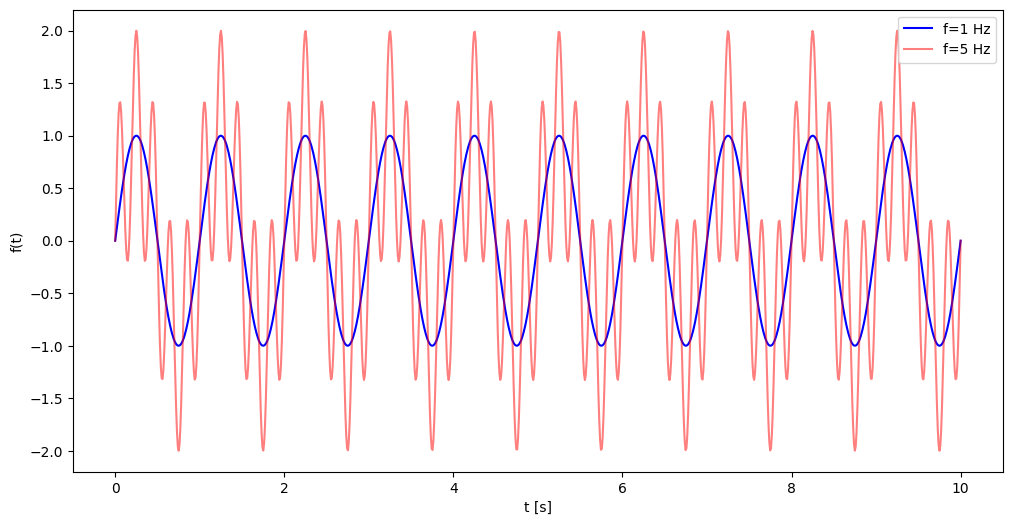

In [13]:
# first create the sample function. We will impose some periodicity to see what structures appear in R2 and R3
t = np.linspace(0, 10, 1000)

f1 = 1 #Hz
f2 = 5  
w1 = 2*np.pi*f1
w2 = 2*np.pi*f2

y1 = np.sin(w1*t)
y2 = y1+np.sin(w2*t)
plt.figure(figsize=(12,6))
plt.plot(t,y1, 'b', label='f={0} Hz'.format(f1))
plt.plot(t,y2, 'r', alpha=0.5, label='f={0} Hz'.format(f2))
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('f(t)')
plt.show()

From this data, we shall now construct various 2d representations. 

In [14]:
x = [1, 2, 3, 4]
for i in range(3): 
    print(np.roll(x,-i))

[1 2 3 4]
[2 3 4 1]
[3 4 1 2]


In [15]:
def embed_2d(y, window_length=1, periodic_boundary=False): 
    pts = [] 
    for i in range(len(y)): 
        if i > len(y)-(window_length+1): 
            if not periodic_boundary:
                break 
        y_shift = np.roll(y, -i) 
        pts.append([y_shift[0], y_shift[window_length]])
        
    return np.array(pts)

In [16]:
def plot_emb(win_len=1):
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    emb1 = embed_2d(y1, window_length=win_len)
    emb2 = embed_2d(y2, window_length=win_len)
    ax[0].plot(emb1[:,0], emb1[:,1])
    ax[1].plot(emb2[:,0], emb2[:,1])
    
    ax[0].set_xlabel('t')
    ax[1].set_xlabel('t')
    ax[0].set_ylabel('y1')
    ax[1].set_ylabel('y2')
    
    ax[0].set_aspect('equal')
    ax[1].set_aspect('equal')


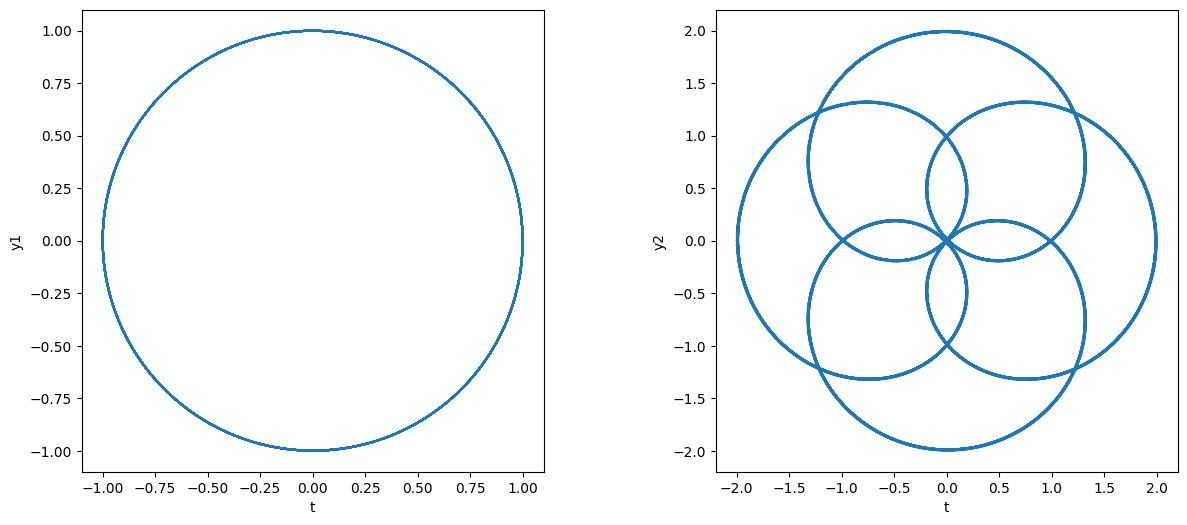

In [17]:
plot_emb(25)

In [18]:
def embed_Nd(y, N=2, periodic_boundary=False): 
    pts = [] 
    for i in range(len(y)): 
        if i > len(y)-N: 
            if not periodic_boundary:
                break 
        y_shift = np.roll(y, -i) 
        pts.append(y_shift[0:N])
        
    return np.array(pts)

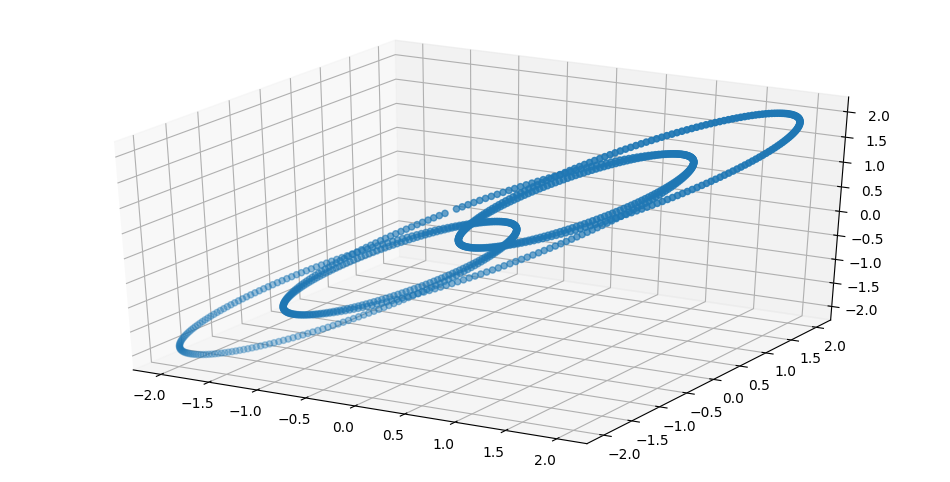

(998, 3)


In [19]:
from mpl_toolkits.mplot3d import Axes3D
emb3 = embed_Nd(y2, N=3)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(emb3[:,0], emb3[:,1], emb3[:,2])

plt.show()
print(emb3.shape)

Finally, let's do the same thing but with 4 dimeions using a colormap for the extra dim. 

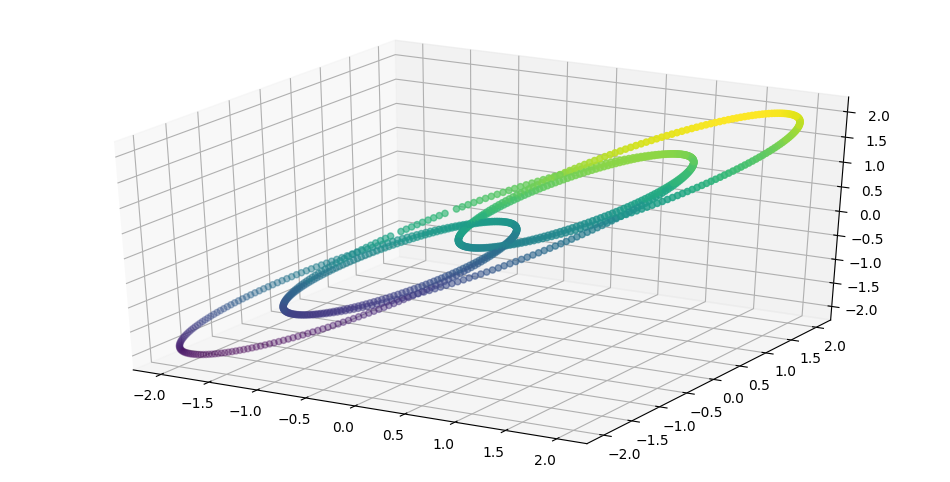

(997, 4)


In [20]:
emb4 = embed_Nd(y2, N=4)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(emb4[:,0], emb4[:,1], emb4[:,2], c=emb4[:,3])

plt.show()
print(emb4.shape)

# Persistance Diagrams

(1000,) (997, 4)
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Text(0.5, 1.0, 'Persistance Diagram for y=sin(t)+sin(5t)')

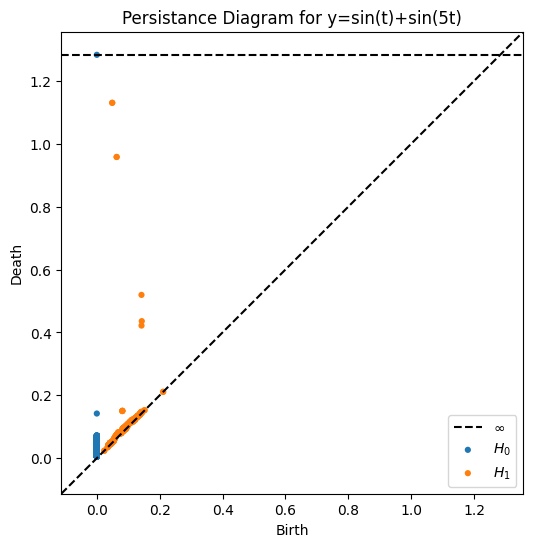

In [25]:
from ripser import Rips
from persim import plot_diagrams

print(y2.shape, emb4.shape)

plt.figure(figsize=(12,6))

# standard scikit-learn syntax
rips = Rips()
diagrams = rips.fit_transform(emb4)
rips.plot(diagrams)

plt.title('Persistance Diagram for y=sin(t)+sin(5t)')

# Mapper

In [26]:
import kmapper as km

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(emb4, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, emb4, nr_cubes=10)

# Visualize it
mapper.visualize(graph, path_html="embedded_4d_sin_output.html",
                 title="slidding window embedded sin wave")

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (997, 4)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (997, 4) using lens shaped (997, 2)

Creating 100 hypercubes.

Created 42 edges and 36 nodes in 0:00:00.029569.
Wrote visualization to: embedded_4d_sin_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>slidding window embedded sin wave | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  position: absolute;\n  right: 00px;\n  top: 0px;\n  width: 90px;\n  height: 90px;\n  z-index: 999999;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppe

# Comparing persistance diagrams 

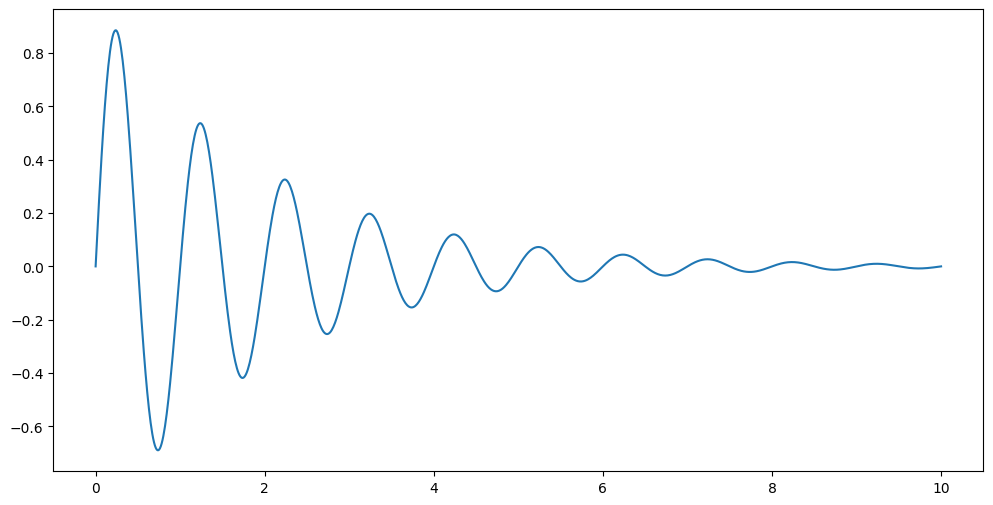

In [27]:
y3 = y1*np.exp(-0.5*t)
plt.figure(figsize=(12,6))
plt.plot(t, y3)
plt.show()

In [38]:
# for analysis, create 1.5 second windows
dt = 10/1000
print(1.5/dt)
N_window = int(1.5/dt)

def plot_persistance_decay(t=0):
    N = int(t/dt)
    print(N)
    y = y3[N:N+N_window]
    # embed into 4-d
    emb4 = embed_Nd(y, N=4)
    
    # create persistance diagram
    plt.figure(figsize=(12,6))

    # standard scikit-learn syntax
    rips = Rips()
    diagrams = rips.fit_transform(emb4)
    rips.plot(diagrams)
    plt.title('Persistance Diagram for t={}s'.format(N*dt))
    

150.0


0
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
900
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


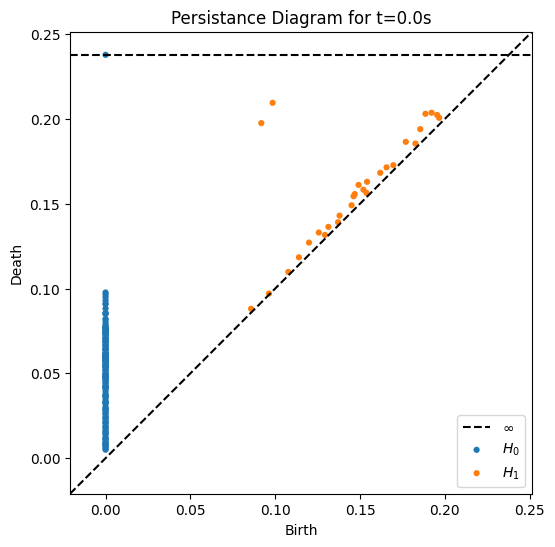

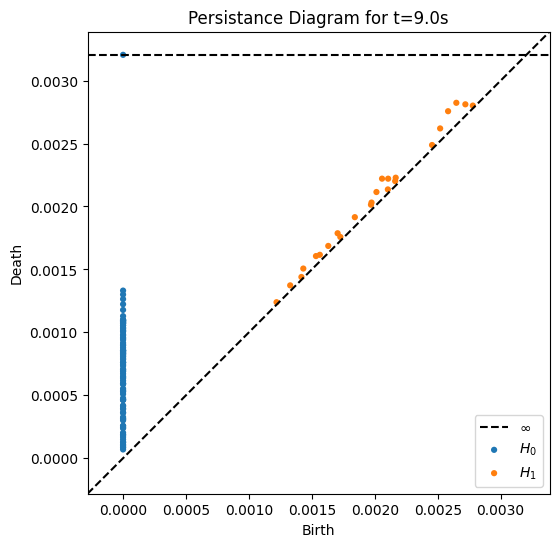

In [41]:
plot_persistance_decay(0)
plot_persistance_decay(9)